#Завдання на використання Pandas + SQL

В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робили в попередній домашці:

In [33]:
import mysql.connector  
from mysql.connector.connection import MySQLConnection  
import datetime
import pandas as pd




con = mysql.connector.connect(user = 'user1', password = '7oygWy6P',
                              host = '3.68.62.36',
                              database = 'employees'
                             )
                              

1. Виведіть кількість співробітників за роком, в який вони були найняті (hire_date) використовуючи pandas.read_sql. Запишіть результат в змінну df та виведіть значення змінної на екран.

In [34]:
import warnings  
warnings.filterwarnings('ignore')

In [35]:
df = pd.read_sql(f'SELECT YEAR(hire_date) AS hire_year, COUNT(emp_no) AS emp_num FROM employees GROUP BY hire_year',con)  
df  


,hire_year,emp_num
0,1986,36150
1,1985,35316
2,1989,28394
3,1994,14835
4,1990,25610
5,1992,20402
6,1987,33501
7,1995,12115
8,1993,17772
9,1999,1514


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1JmyPlxFwRRxuCJ33VN-AqMDPSdV_DPXI)

2. Виведіть лінійний графік залежності кількості найманих співробітників від року найму. Ми ж не просто так дані з бази дістали :)
Перейменувати назви колонок датафрейму можна або методами pandas, або в sql запиті в попередньому завданні. Також, аби графік вийшов правильний, треба відсортувати роки за зростанням. І це також можна зробити аби в pandas, або в SQL.

In [36]:
import matplotlib.pyplot as plt

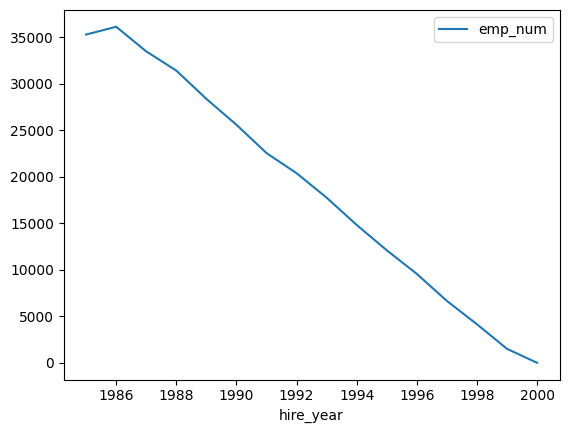

In [37]:
df_sorted = df.sort_values(by = 'hire_year')
df_sorted.plot(x ='hire_year', y = 'emp_num');

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1vXUpPNNvIL5dxsypr9sklvtq-H-NDwzU)

3. З допомогою SQL для робітників позиції `Engineer`, які вже не працюють в компанії (тобто у них є значення to_date, яке заповнено НЕ значенням за замовчанням) знайдіть кількість повних років перебування на позиції. Позиція зберігається в колонці `title` в таблиці `titles`. Кількість років перебування на позиції можна отримати наприклад з використанням функції `timestampdiff`. Ознайомтесь з її використанням в [документації](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_timestampdiff).

Результат запишіть в змінну `df_years` та виведіть цю змінну на екран.

In [42]:
sql = """
SELECT from_date, to_date, TIMESTAMPDIFF(YEAR, from_date, to_date) AS duration
FROM titles
WHERE title = 'Engineer' AND to_date != '9999-01-01'
"""

In [43]:
df_years = pd.read_sql(sql,con)  
df_years

,from_date,to_date,duration
0,1986-12-01,1995-12-01,9
1,1990-02-18,1995-02-18,5
2,1992-12-18,2000-12-18,8
3,1987-04-03,1995-04-03,8
4,1995-03-20,2001-03-19,5
...,...,...,...
84015,1989-11-23,1998-11-23,9
84016,1989-07-30,1994-07-30,5
84017,1993-02-22,1993-10-27,0
84018,1996-05-13,2002-05-13,6


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1nBqeBVYFuSQlMx9lNaDJJ_8hMx7yV9bX)

4. Використовуючи дані в  `df_years`, побудуйте гістограму кількості років, протягом яких люди з назвою позиції `Engineer` перебували на позиції. Не забудьте дати назву діаграмі, а також підписати вісі.

In [ ]:
df_years.hist()  
plt.title('Duration on Engineer position')  
plt.xlabel('Number of years')  
plt.ylabel('Number

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1RKbfs5R9oniNs9XJcUpdlXFT-0BKXvPB)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [ ]:
con.close()